In [1]:
import os
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#my functions
from utils import load_data,my_xgb_cv_predict

#go to working directory
work_dir='/mnt/Data1/ribli/mhc/'
os.chdir(work_dir)

Using Theano backend.
/mnt/Data1/ribli/tools/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [2]:
x,y=load_data(hla_representation='simple',seq_representation='simple')

Reading from file...
Creating representation...
Using  83751 data points
Done, It took: 0.691668987274 s


In [3]:
#model params
params = {'max_depth':9,
         'eta':0.05,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "reg:linear",
         'eval_metric': 'rmse',
         'nthread':4}

y_pred=my_xgb_cv_predict(params,x,y,n_folds=5)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.546473	eval-rmse:2.534769
[500]	train-rmse:0.605416	eval-rmse:0.893717
[1000]	train-rmse:0.447759	eval-rmse:0.867443
[1500]	train-rmse:0.352314	eval-rmse:0.858533
[2000]	train-rmse:0.289189	eval-rmse:0.856670
[2500]	train-rmse:0.240901	eval-rmse:0.856303
Stopping. Best iteration:
[2441]	train-rmse:0.246597	eval-rmse:0.856206

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.544124	eval-rmse:2.544305
[500]	train-rmse:0.617711	eval-rmse:0.892310
[1000]	train-rmse:0.453340	eval-rmse:0.862671
[1500]	train-rmse:0.362976	eval-rmse:0.855714
Stopping. Best iteration:
[1700]	train-rmse:0.336498	eval-rmse:0.855041

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.545614	eval-rmse:2.563958
[500]	train-rmse:0.612015	eval-rmse:0.906225
[1000]	train-rmse:0.455867	eval-rmse:0.879405
[1500]	train-rmse:0.361847	eval-rmse:0.873442
Stopping. Best iteration:
[1665]	train-rms

### Correlation plot

Correlation: 0.76155618459


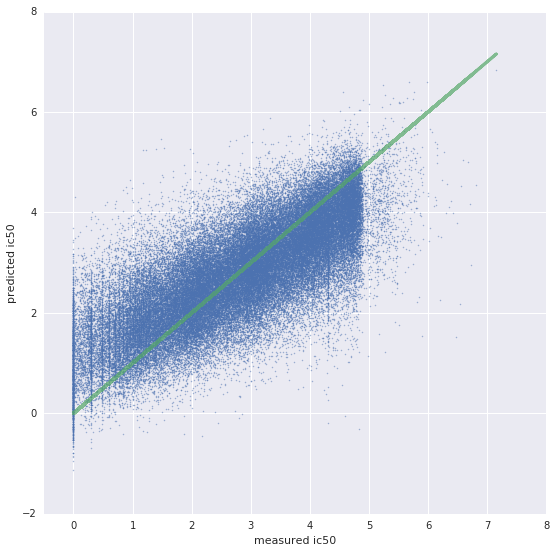

In [4]:
plt.figure(figsize=(9,9))
plt.plot(y,y_pred,'.',ms=3,alpha=0.5)
plt.plot(y,y,lw=3,alpha=0.7)
plt.xlim(xmin=-0.5)
plt.xlabel('measured ic50')
plt.ylabel('predicted ic50')

from scipy.stats import pearsonr
print 'Correlation:',pearsonr(y,y_pred)[0]

### Error depending on the length of peptid

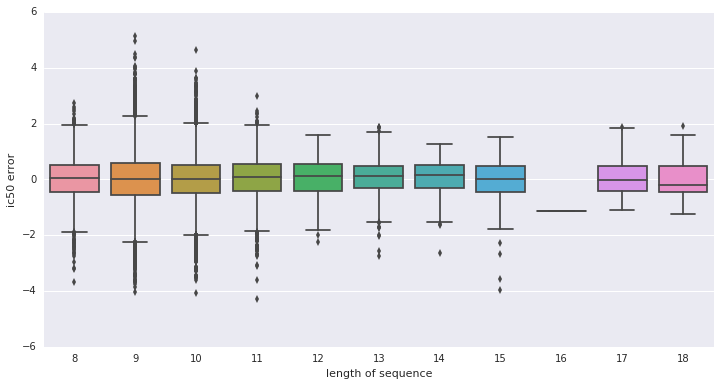

In [5]:
leng=x[:,-1]
plt.figure(figsize=(12,6))
sns.boxplot(leng,y-y_pred)
plt.xlabel('length of sequence')
dump=plt.ylabel('ic50 error')